## Object Detection with Correlation

Task: Detect the person in a crowd.

Since the dimensions of the person's image matches it's counterpart on the main image, we can utilize the concept of Normalized cross-correlation. 
This means that we will basically use the person's image as a kernel and slide it over the main image. At the end, there will be a spike where the person is.

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

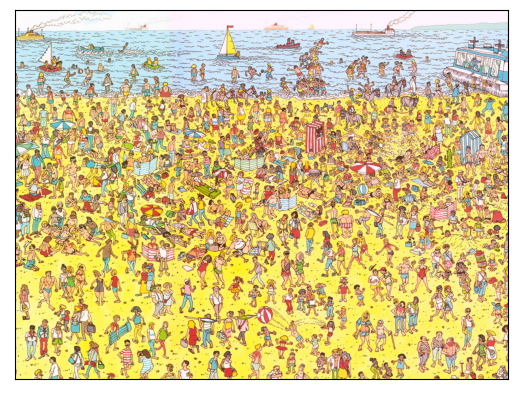

In [5]:
main_img = cv2.imread("./images/beach.png")
main_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(main_img)

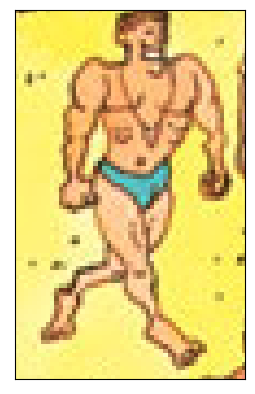

In [6]:
person_img = cv2.imread("./images/person.png")
person_img = cv2.cvtColor(person_img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(person_img)

Run normalized cross correlation on the image. The highest point is the location is where a match is found.

0.9950385689735413 (40, 544)


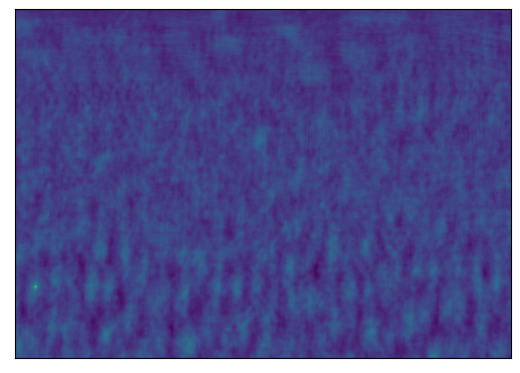

In [7]:
# Matching the image

detection = cv2.matchTemplate(main_img, person_img, method=cv2.TM_CCOEFF_NORMED)

plt.xticks([]), plt.yticks([])
plt.imshow(detection)

_, max_value, _, max_loc = cv2.minMaxLoc(detection)
print(max_value, max_loc)

plt.imshow(detection)

Showing a rectangle around person on the main image

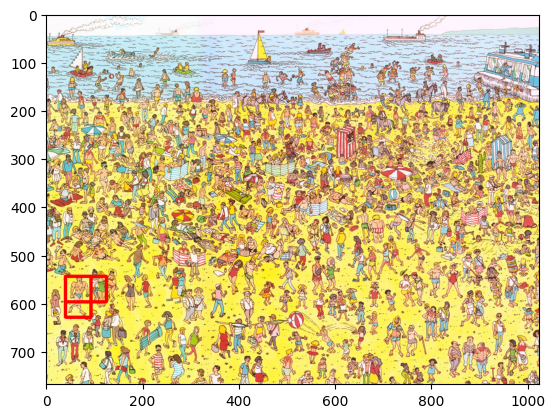

In [10]:
corner1 = (max_loc)
corner2 = (max_loc[0] + person_img.shape[1], max_loc[1] + person_img.shape[0])

final_img = cv2.rectangle(main_img, corner1, corner2, (255, 0, 0), 5)
plt.imshow(final_img)